<a href="https://colab.research.google.com/github/desbaa32/Master2BD_tp_pro/blob/master/TP4_MFBD_Analyse_en_Composantes_Principales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Installer les packages nécessaires
install.packages("FactoMineR")
install.packages("factoextra")
install.packages("corrplot")
install.packages("ggpubr")

# Charger les libraries
library(FactoMineR)
library(factoextra)
library(corrplot)
library(ggpubr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘lazyeval’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘crosstalk’, ‘estimability’, ‘mvtnorm’, ‘numDeriv’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggrepel’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘corrplot’, ‘viridis’, ‘ggsci’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘dendextend’, ‘ggpubr’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https:

#### Chargement et exploration des données

In [2]:
# Charger le jeu de données décathlon
data(decathlon2)

# Explorer la structure
cat("Dimensions du dataset :", dim(decathlon2), "\n")
cat("\nNoms des variables :\n")
print(colnames(decathlon2))
cat("\nPremières lignes :\n")
print(head(decathlon2[, 1:6]))

# Statistiques descriptives
cat("\nRésumé statistique :\n")
print(summary(decathlon2[, 1:10]))

Dimensions du dataset : 27 13 

Noms des variables :
 [1] "X100m"        "Long.jump"    "Shot.put"     "High.jump"    "X400m"       
 [6] "X110m.hurdle" "Discus"       "Pole.vault"   "Javeline"     "X1500m"      
[11] "Rank"         "Points"       "Competition" 

Premières lignes :
          X100m Long.jump Shot.put High.jump X400m X110m.hurdle
SEBRLE    11.04      7.58    14.83      2.07 49.81        14.69
CLAY      10.76      7.40    14.26      1.86 49.37        14.05
BERNARD   11.02      7.23    14.25      1.92 48.93        14.99
YURKOV    11.34      7.09    15.19      2.10 50.42        15.31
ZSIVOCZKY 11.13      7.30    13.48      2.01 48.62        14.17
McMULLEN  10.83      7.31    13.76      2.13 49.91        14.38

Résumé statistique :
     X100m         Long.jump        Shot.put       High.jump    
 Min.   :10.44   Min.   :6.800   Min.   :12.68   Min.   :1.860  
 1st Qu.:10.84   1st Qu.:7.210   1st Qu.:14.17   1st Qu.:1.930  
 Median :10.97   Median :7.310   Median :14.57   Med

#### Préparation des données actives


In [5]:
# Sélection des individus et variables actives
decathlon2.active <- decathlon2[1:23, 1:10]

# Vérification
cat("Dimensions des données actives :", dim(decathlon2.active), "\n")
cat("\nIndividus actifs :\n")
print(rownames(decathlon2.active))
cat("\nVariables actives :\n")
print(colnames(decathlon2.active))

Dimensions des données actives : 23 10 

Individus actifs :
 [1] "SEBRLE"      "CLAY"        "BERNARD"     "YURKOV"      "ZSIVOCZKY"  
 [6] "McMULLEN"    "MARTINEAU"   "HERNU"       "BARRAS"      "NOOL"       
[11] "BOURGUIGNON" "Sebrle"      "Clay"        "Karpov"      "Macey"      
[16] "Warners"     "Zsivoczky"   "Hernu"       "Bernard"     "Schwarzl"   
[21] "Pogorelov"   "Schoenbeck"  "Barras"     

Variables actives :
 [1] "X100m"        "Long.jump"    "Shot.put"     "High.jump"    "X400m"       
 [6] "X110m.hurdle" "Discus"       "Pole.vault"   "Javeline"     "X1500m"      


 #### Réalisation de l'ACP


In [6]:
# ACP avec centrage-réduction automatique
res.pca <- PCA(decathlon2.active, graph = FALSE, ncp = 5)

# Aperçu des résultats
print(res.pca)

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 23 individuals, described by 10 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error o

 #### Choix du nombre de dimensions


Eigenvalues et variance expliquée :
       eigenvalue variance.percent cumulative.variance.percent
Dim.1   4.1242133        41.242133                    41.24213
Dim.2   1.8385309        18.385309                    59.62744
Dim.3   1.2391403        12.391403                    72.01885
Dim.4   0.8194402         8.194402                    80.21325
Dim.5   0.7015528         7.015528                    87.22878
Dim.6   0.4228828         4.228828                    91.45760
Dim.7   0.3025817         3.025817                    94.48342
Dim.8   0.2744700         2.744700                    97.22812
Dim.9   0.1552169         1.552169                    98.78029
Dim.10  0.1219710         1.219710                   100.00000


Warning message in geom_bar(stat = "identity", fill = barfill, color = barcolor, :
“Ignoring empty aesthetic: `width`.”



Dimensions avec eigenvalue > 1 : 3
Variance cumulative des 2 premières dimensions : 59.6 %

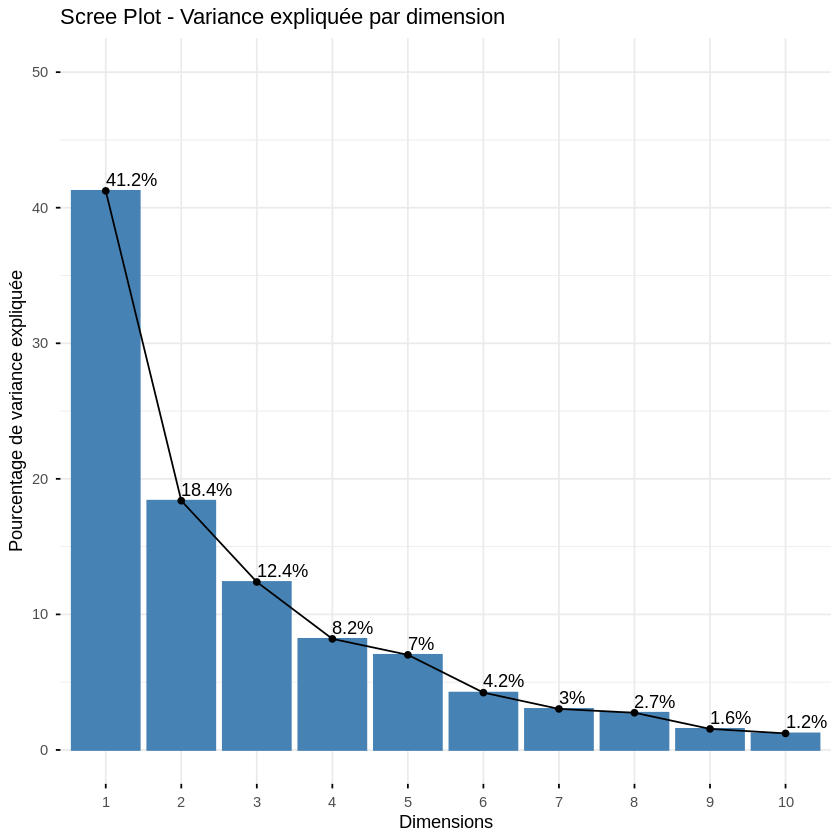

In [8]:
# Évaluation de la variance expliquée
eig.val <- as.data.frame(get_eigenvalue(res.pca))
cat("Eigenvalues et variance expliquée :\n")
print(eig.val)

# Scree plot
fviz_eig(res.pca, addlabels = TRUE, ylim = c(0, 50),
         main = "Scree Plot - Variance expliquée par dimension",
         xlab = "Dimensions", ylab = "Pourcentage de variance expliquée")

# Règle de Kaiser (eigenvalues > 1)
cat("\nDimensions avec eigenvalue > 1 :", sum(eig.val$eigenvalue > 1))
cat("\nVariance cumulative des 2 premières dimensions :",
    round(eig.val$cumulative.variance.percent[2], 1), "%")

 #### Interprétation simultanée

 ##### Graphique des variables


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.
ℹ The deprecated feature was likely used in the ggpubr package.
  Please report the issue at <https://github.com/kassambara/ggpubr/issues>.”
Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.
ℹ The deprecated feature was likely used in the factoextra package.
  Please report the issue at <https://github.com/kassambara/factoextra/issues>.”


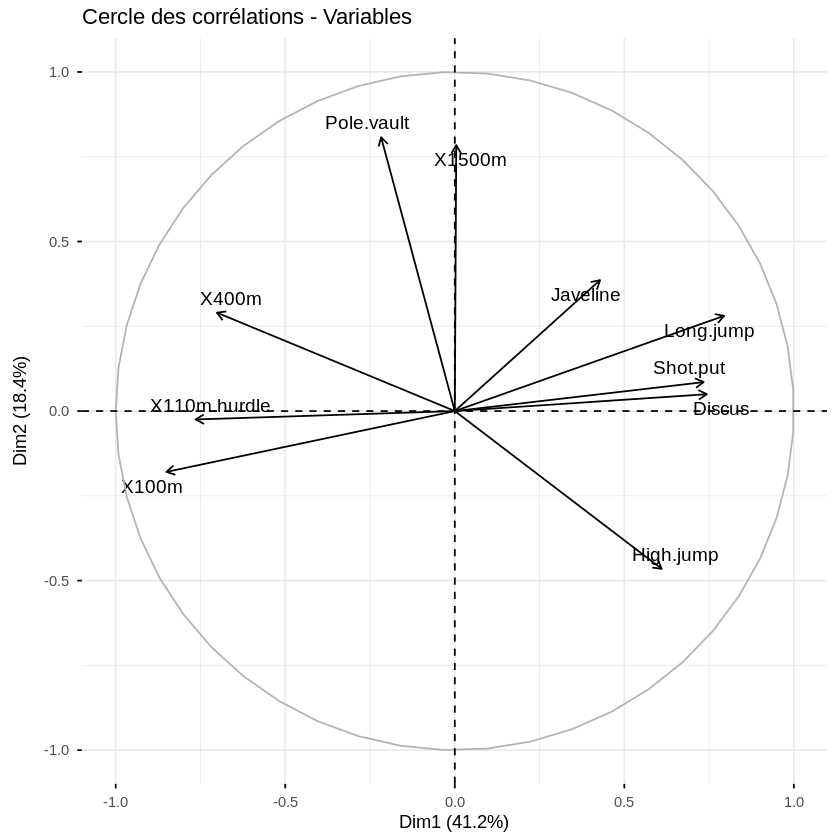

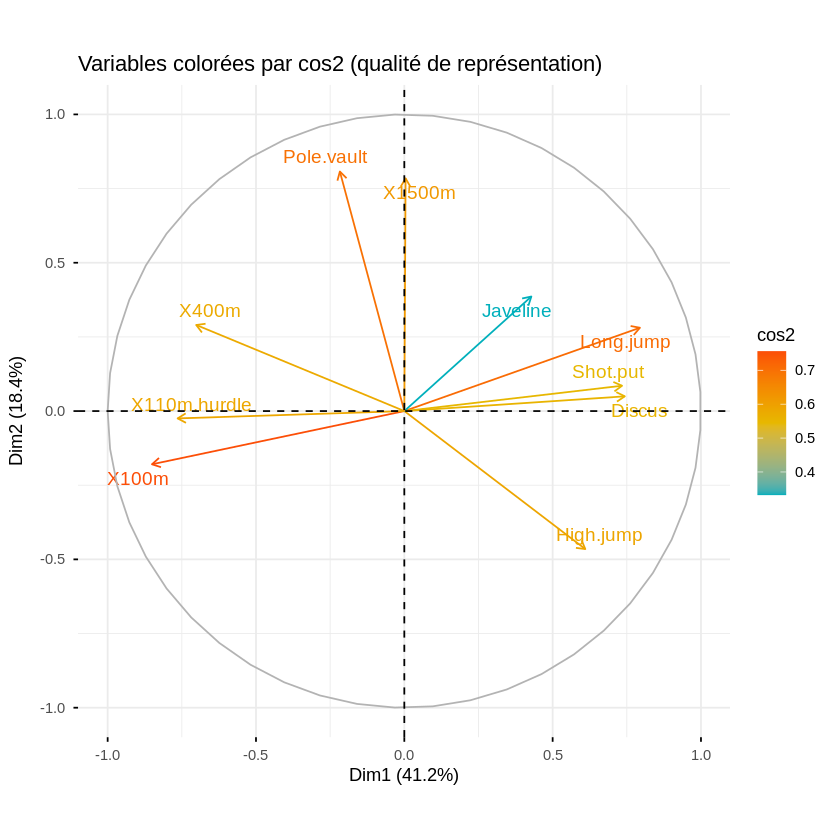

In [9]:
# Cercle des corrélations
fviz_pca_var(res.pca, col.var = "black", repel = TRUE,
             title = "Cercle des corrélations - Variables")

# Avec qualité de représentation
fviz_pca_var(res.pca, col.var = "cos2", repel = TRUE,
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             title = "Variables colorées par cos2 (qualité de représentation)")

##### Graphique des individus


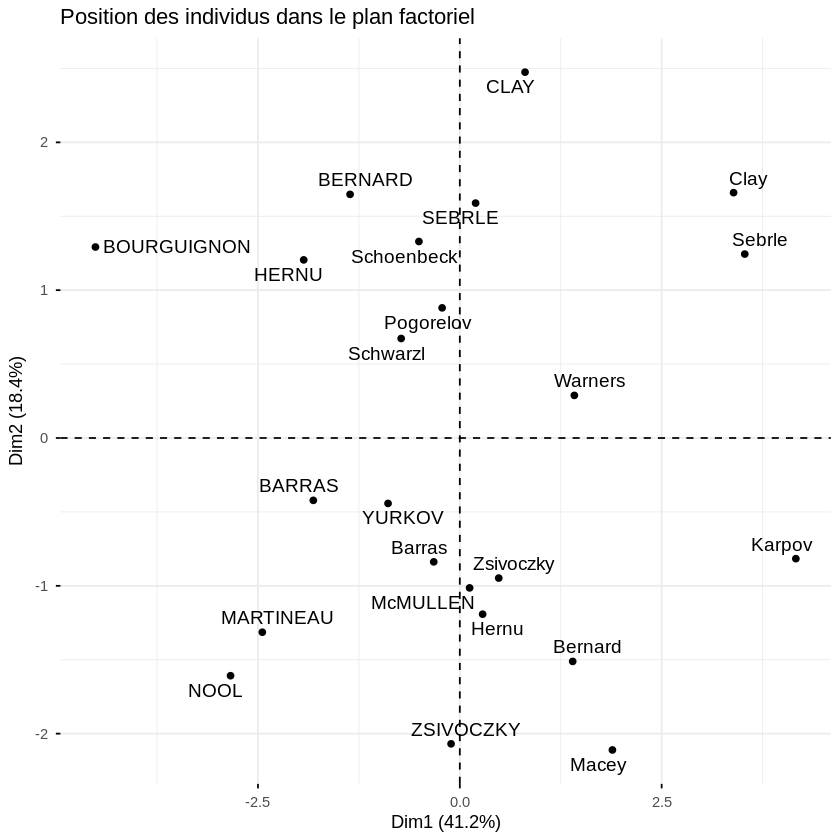

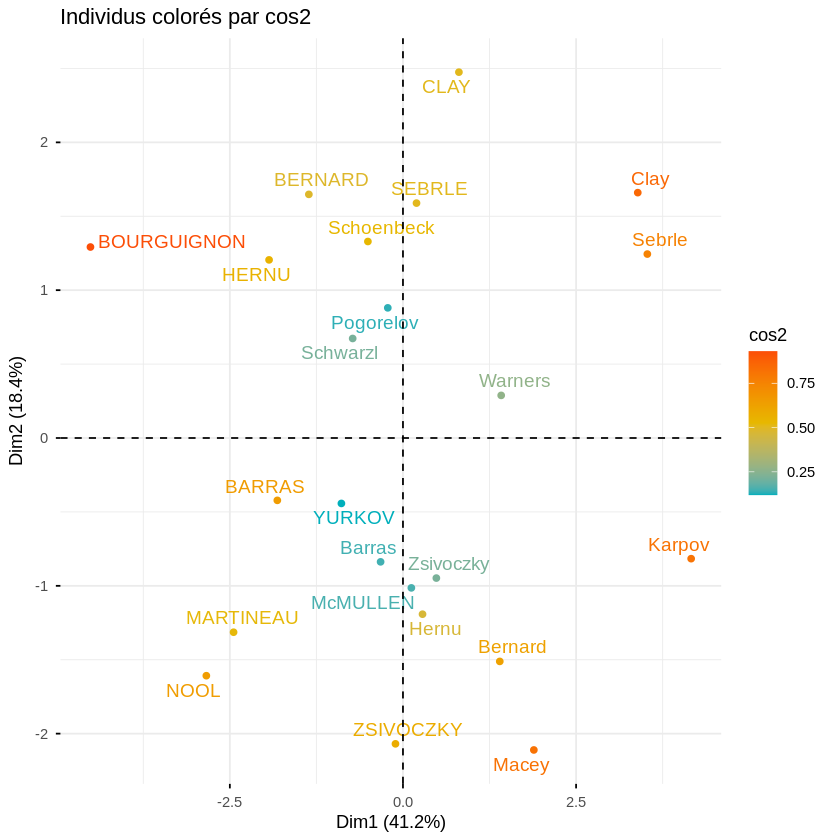

In [10]:
# Positions des individus
fviz_pca_ind(res.pca, repel = TRUE,
             title = "Position des individus dans le plan factoriel")

# Colorer par qualité de représentation
fviz_pca_ind(res.pca, col.ind = "cos2", repel = TRUE,
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             title = "Individus colorés par cos2")

 #### Utilisation des indicateurs

##### Contributions des variables



Contributions des variables à la dimension 1 :
       X100m    Long.jump     Shot.put    High.jump        X400m X110m.hurdle 
       17.54        15.29        13.06         9.02        11.94        14.16 
      Discus   Pole.vault     Javeline       X1500m 
       13.39         1.14         4.45         0.00 

Contributions des variables à la dimension 2 :
       X100m    Long.jump     Shot.put    High.jump        X400m X110m.hurdle 
        1.75         4.29         0.40        11.77         4.58         0.03 
      Discus   Pole.vault     Javeline       X1500m 
        0.13        35.46         8.11        33.47 


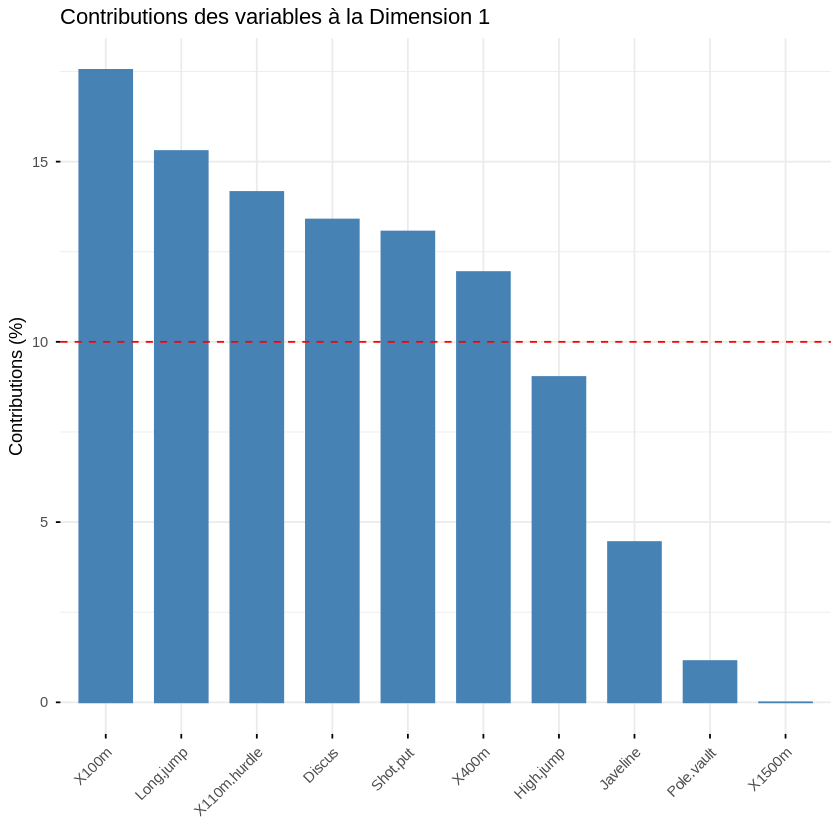

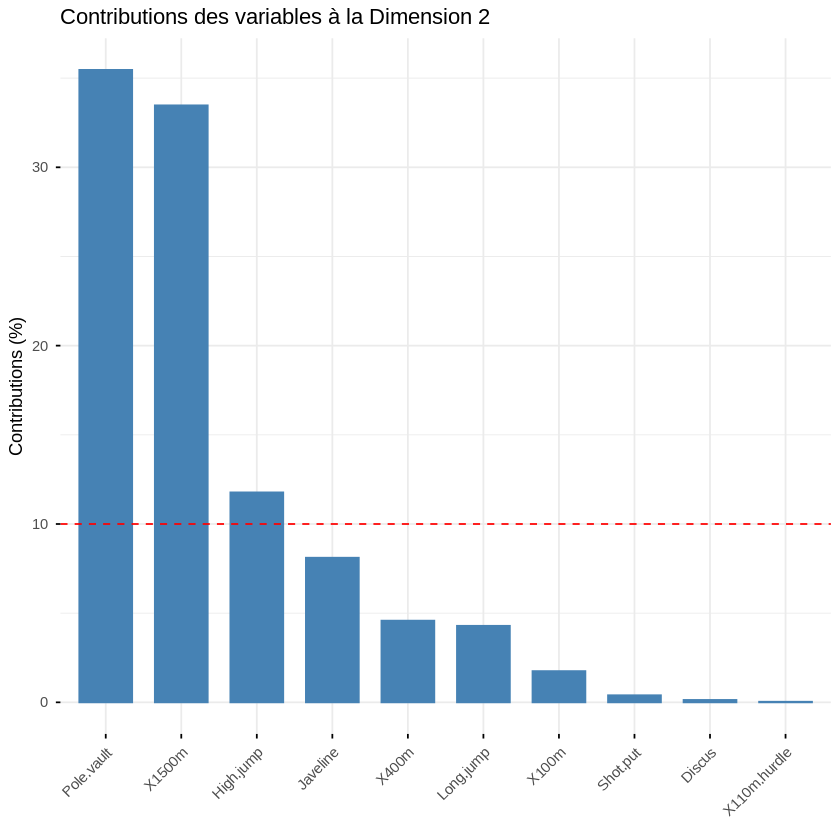

In [11]:
# Contributions aux axes principaux
cat("Contributions des variables à la dimension 1 :\n")
print(round(res.pca$var$contrib[,1], 2))

cat("\nContributions des variables à la dimension 2 :\n")
print(round(res.pca$var$contrib[,2], 2))

# Visualisation des contributions
fviz_contrib(res.pca, choice = "var", axes = 1, top = 10,
             title = "Contributions des variables à la Dimension 1")

fviz_contrib(res.pca, choice = "var", axes = 2, top = 10,
             title = "Contributions des variables à la Dimension 2")

##### Qualité de représentation (cos2)

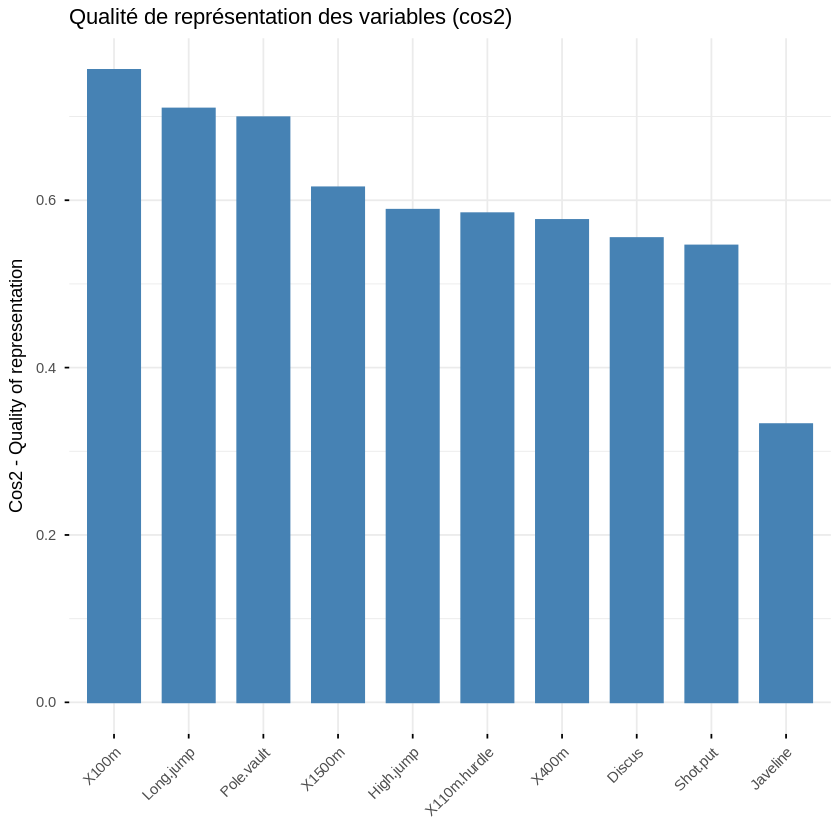

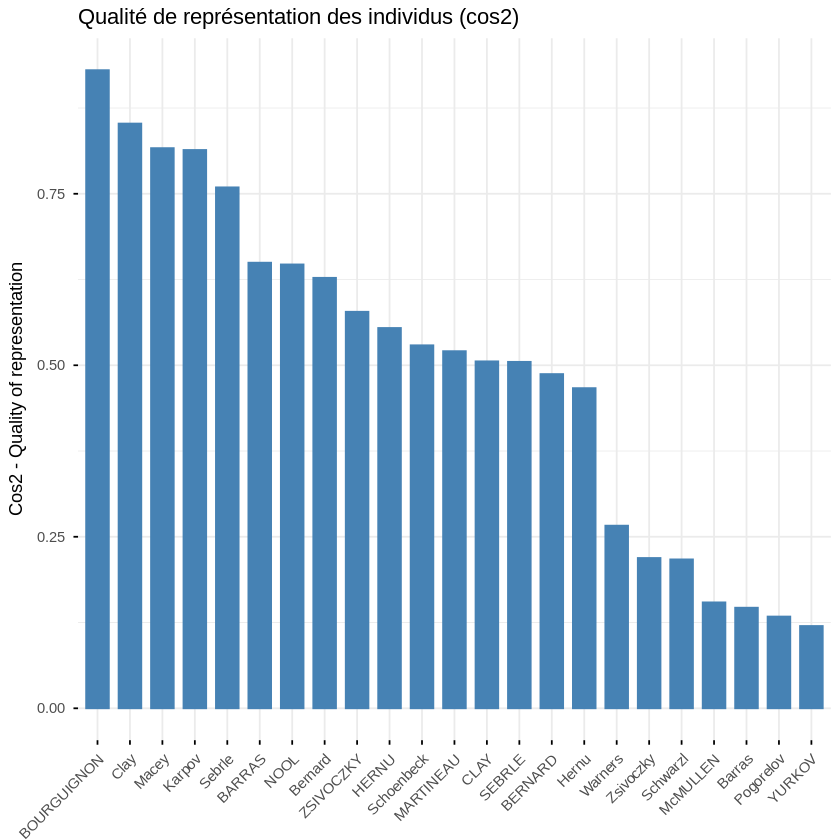

In [12]:
# Cos2 des variables
fviz_cos2(res.pca, choice = "var", axes = 1:2,
          title = "Qualité de représentation des variables (cos2)")

# Cos2 des individus
fviz_cos2(res.pca, choice = "ind", axes = 1:2,
          title = "Qualité de représentation des individus (cos2)")

##### Description automatique des dimensions

In [13]:

# Variables significativement corrélées avec chaque dimension
res.desc <- dimdesc(res.pca, axes = 1:2, proba = 0.05)

cat("Variables corrélées avec la dimension 1 :\n")
print(res.desc$Dim.1$quanti)

cat("\nVariables corrélées avec la dimension 2 :\n")
print(res.desc$Dim.2$quanti)

Variables corrélées avec la dimension 1 :
             correlation      p.value
Long.jump      0.7941806 6.059893e-06
Discus         0.7432090 4.842563e-05
Shot.put       0.7339127 6.723102e-05
High.jump      0.6100840 1.993677e-03
Javeline       0.4282266 4.149192e-02
X400m         -0.7016034 1.910387e-04
X110m.hurdle  -0.7641252 2.195812e-05
X100m         -0.8506257 2.727129e-07

Variables corrélées avec la dimension 2 :
           correlation      p.value
Pole.vault   0.8074511 3.205016e-06
X1500m       0.7844802 9.384747e-06
High.jump   -0.4652142 2.529390e-02


#### interprétation

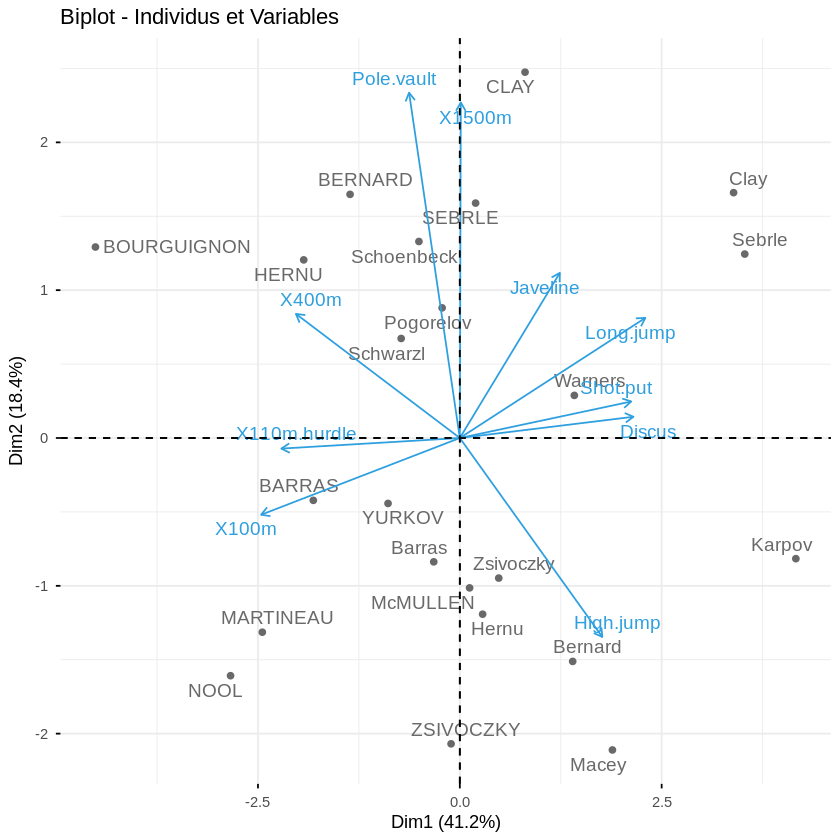

In [14]:
# Biplot complet
fviz_pca_biplot(res.pca, repel = TRUE,
                col.var = "#2E9FDF",
                col.ind = "#696969",
                title = "Biplot - Individus et Variables")

In [15]:
# Interprétation guidée
cat("=== SYNTHÈSE DE L'ACP ===\n")
cat("1. DIMENSION 1 (", round(eig.val$variance.percent[1], 1), "% de variance)\n")
cat("   Variables positives :", rownames(res.desc$Dim.1$quanti)[res.desc$Dim.1$quanti[,1] > 0][1:3], "\n")
cat("   Variables négatives :", rownames(res.desc$Dim.1$quanti)[res.desc$Dim.1$quanti[,1] < 0][1:3], "\n")

cat("\n2. DIMENSION 2 (", round(eig.val$variance.percent[2], 1), "% de variance)\n")
cat("   Variables positives :", rownames(res.desc$Dim.2$quanti)[res.desc$Dim.2$quanti[,1] > 0][1:3], "\n")
cat("   Variables négatives :", rownames(res.desc$Dim.2$quanti)[res.desc$Dim.2$quanti[,1] < 0][1:3], "\n")

# Individus extrêmes
ind.coord <- res.pca$ind$coord
cat("\n3. INDIVIDUS EXTRÊMES :\n")
cat("   Haut-Droite :", rownames(ind.coord)[which.max(ind.coord[,1] + ind.coord[,2])], "\n")
cat("   Haut-Gauche :", rownames(ind.coord)[which.max(ind.coord[,2] - ind.coord[,1])], "\n")
cat("   Bas-Droite :", rownames(ind.coord)[which.max(ind.coord[,1] - ind.coord[,2])], "\n")
cat("   Bas-Gauche :", rownames(ind.coord)[which.min(ind.coord[,1] + ind.coord[,2])], "\n")

=== SYNTHÈSE DE L'ACP ===
1. DIMENSION 1 ( 41.2 % de variance)
   Variables positives : Long.jump Discus Shot.put 
   Variables négatives : X400m X110m.hurdle X100m 

2. DIMENSION 2 ( 18.4 % de variance)
   Variables positives : Pole.vault X1500m NA 
   Variables négatives : High.jump NA NA 

3. INDIVIDUS EXTRÊMES :
   Haut-Droite : Clay 
   Haut-Gauche : BOURGUIGNON 
   Bas-Droite : Karpov 
   Bas-Gauche : NOOL 
